In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats import binom
import pandas as pd

1.- Una barra de 12 pulg que está sujeta por ambos extremos se somete a una cantidad creciente de esfuerzo hasta que se rompe. Sea Y = la distancia del extremo izquierdo al punto donde ocurre la ruptura. Suponga que Y tiene la función de densidad de probabilidad:

# **a.- La función de distribución acumulativa de Y.**

In [5]:
# Definimos la función de densidad de probabilidad (PDF)
def pdf(y):
    return (1/24) * y * (1 - y/12)

In [6]:
# Calculamos la función de distribución acumulativa (CDF)
def cdf(y):
    # Integrar la PDF desde 0 hasta y
    result, _ = quad(pdf, 0, y)
    return result

In [7]:
# Generamos valores de Y para evaluar la CDF
y_values = np.linspace(0, 12, 1000)

In [8]:
# Calculamos la CDF para estos valores
cdf_values = np.array([cdf(y) for y in y_values])

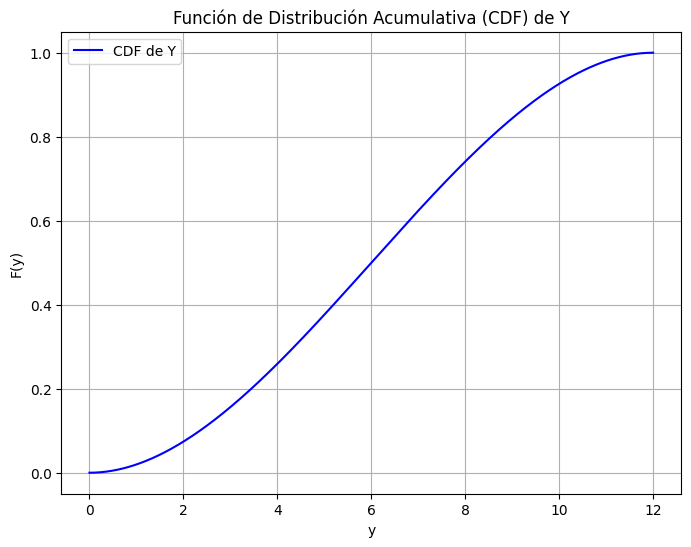

In [9]:
# Graficamos la CDF
plt.figure(figsize=(8, 6))
plt.plot(y_values, cdf_values, label='CDF de Y', color='blue')
plt.title('Función de Distribución Acumulativa (CDF) de Y')
plt.xlabel('y')
plt.ylabel('F(y)')
plt.grid(True)
plt.legend()
plt.show()

# **b.- P(Y ≤ 4), P(Y > 6) y P(4 ≤ Y ≤ 6)**

In [10]:
# Calculamos las probabilidades específicas
# P(Y ≤ 4)
p_y_leq_4 = cdf(4)

# P(Y > 6) es 1 - P(Y ≤ 6)
p_y_gt_6 = 1 - cdf(6)

# P(4 ≤ Y ≤ 6) es P(Y ≤ 6) - P(Y ≤ 4)
p_y_between_4_and_6 = cdf(6) - cdf(4)

In [18]:
# Imprimimos los resultados como porcentajes
print(f"P(Y ≤ 4): {p_y_leq_4 * 100:.2f}%")
print(f"P(Y > 6): {p_y_gt_6 * 100:.2f}%")
print(f"P(4 ≤ Y ≤ 6): {p_y_between_4_and_6 * 100:.2f}%")

P(Y ≤ 4): 25.93%
P(Y > 6): 50.00%
P(4 ≤ Y ≤ 6): 24.07%


# **c.- E(Y), E(Y2) y Var(Y)**.

In [13]:
# Esperanza E(Y)
def expected_value():
    result, _ = quad(lambda y: y * pdf(y), 0, 12)
    return result

# Esperanza del cuadrado E(Y^2)
def expected_value_squared():
    result, _ = quad(lambda y: y**2 * pdf(y), 0, 12)
    return result

# Calculamos E(Y), E(Y^2) y Var(Y)
E_Y = expected_value()
E_Y2 = expected_value_squared()
Var_Y = E_Y2 - E_Y**2

In [14]:
# Imprimimos los resultados
print(f"E(Y): {E_Y:.4f}")
print(f"E(Y^2): {E_Y2:.4f}")
print(f"Var(Y): {Var_Y:.4f}")

E(Y): 6.0000
E(Y^2): 43.2000
Var(Y): 7.2000


# **d.- La probabilidad de que el punto de ruptura ocurra a más de 2 pulg del punto de ruptura esperado.**

In [15]:
# Calculamos las probabilidades para |Y - E(Y)| > 2
lower_bound = E_Y - 2
upper_bound = E_Y + 2

# Probabilidad de que el punto de ruptura ocurra más de 2 pulgadas del punto de ruptura esperado
probability = cdf(lower_bound) + (1 - cdf(upper_bound))

In [16]:
# Imprimimos el resultado como porcentaje
print(f"P(|Y - E(Y)| > 2): {probability * 100:.2f}%")

P(|Y - E(Y)| > 2): 51.85%


2.- Sea X la temperatura, en grados centígrados, a la cual ocurre una reacción química.  Suponga que X tiene una función de densidad de probabilidad:

# **a.- Corrobore que la función es una distribución válida.**

In [20]:
# Definimos la función de densidad de probabilidad (PDF)
def pdf(x):
    if -1 <= x <= 2:
        return (1/9) * (4 - x**2)
    else:
        return 0

In [21]:
# Verificar que la PDF sea no negativa en el intervalo
def check_non_negativity():
    x_values = np.linspace(-1, 2, 1000)
    pdf_values = np.array([pdf(x) for x in x_values])
    return np.all(pdf_values >= 0)

In [22]:
# Calcular la integral de la PDF sobre su dominio
def verify_integral():
    integral, _ = quad(pdf, -1, 2)
    return integral

In [23]:
# Verificar la validez de la PDF
is_non_negative = check_non_negativity()
integral_value = verify_integral()

In [24]:
# Imprimir los resultados
print(f"La función PDF es no negativa en el intervalo [-1, 2]: {is_non_negative}")
print(f"Integral de la PDF sobre el intervalo [-1, 2]: {integral_value:.4f}")

# Verificar si la integral es aproximadamente 1
if np.isclose(integral_value, 1):
    print("La función es una distribución de probabilidad válida.")
else:
    print("La función NO es una distribución de probabilidad válida.")

La función PDF es no negativa en el intervalo [-1, 2]: True
Integral de la PDF sobre el intervalo [-1, 2]: 1.0000
La función es una distribución de probabilidad válida.


# **b.- Determine la función de distribución acumulativa.**

In [25]:
# Calculamos la función de distribución acumulativa (CDF)
def cdf(x):
    if x < -1:
        return 0
    elif -1 <= x <= 2:
        result, _ = quad(pdf, -1, x)
        return result
    else:
        return 1

In [26]:
# Probamos la CDF en varios puntos
test_points = [-2, -1, 0, 1, 2, 3]
cdf_values = [cdf(x) for x in test_points]

# Imprimir los resultados
print("Función de distribución acumulativa (CDF) en varios puntos:")
for point, value in zip(test_points, cdf_values):
    print(f"F({point}) = {value:.4f}")

Función de distribución acumulativa (CDF) en varios puntos:
F(-2) = 0.0000
F(-1) = 0.0000
F(0) = 0.4074
F(1) = 0.8148
F(2) = 1.0000
F(3) = 1.0000


# **c.- E(Y), E(Y2) y Var(Y).**

In [27]:
# Calcular E(X)
def expected_value():
    result, _ = quad(lambda x: x * pdf(x), -1, 2)
    return result

# Calcular E(X^2)
def expected_value_squared():
    result, _ = quad(lambda x: x**2 * pdf(x), -1, 2)
    return result

# Calcular E(X), E(X^2) y Var(X)
E_X = expected_value()
E_X2 = expected_value_squared()
Var_X = E_X2 - E_X**2

In [29]:
print(f"E(X): {E_X:.4f}")
print(f"E(X^2): {E_X2:.4f}")
print(f"Var(X): {Var_X:.4f}")

E(X): 0.2500
E(X^2): 0.6000
Var(X): 0.5375


# **d.- Calcular la probabilidad de que la temperatura sea menor a 0°C**

In [30]:
# Calcular la probabilidad de que la temperatura sea menor a 0°C
probability_less_than_0 = cdf(0)

# Imprimir el resultado como porcentaje
print(f"P(X < 0) en porcentaje: {probability_less_than_0 * 100:.2f}%")

P(X < 0) en porcentaje: 40.74%


# e.- La probabilidad de que la temperatura sea entre 4°C y **6°C**

In [31]:
# Calcular la probabilidad de que la temperatura sea entre 4°C y 6°C
probability_between_4_and_6 = cdf(6) - cdf(4)

# Imprimir el resultado como porcentaje
print(f"P(4 ≤ X ≤ 6) en porcentaje: {probability_between_4_and_6 * 100:.2f}%")

P(4 ≤ X ≤ 6) en porcentaje: 0.00%


3.- El artículo “Computer Assisted Net Weight Control” (Quality Progress, 1983: 22-25) sugiere una distribución normal con media de 137.2 oz y una desviación estándar de 1.6 oz del contenido real de frascos de cierto tipo. El contenido declarado fue de 135 oz.

# **a.- ¿Cuál es la probabilidad de que un solo frasco contenga más que el contenido declarado?**

In [34]:
# Parámetros de la distribución normal
mu = 137.2  # Media
sigma = 1.6  # Desviación estándar

# Contenido declarado
contenido_declarado = 135

# Calcular la probabilidad de que el contenido sea menor o igual al contenido declarado
p_less_than_or_equal_135 = norm.cdf(contenido_declarado, mu, sigma)

# Calcular la probabilidad de que el contenido sea mayor al contenido declarado
p_greater_than_135 = 1 - p_less_than_or_equal_135

# Imprimir el resultado como porcentaje
print(f"P(X > {contenido_declarado} oz): {p_greater_than_135 * 100:.2f}%")

P(X > 135 oz): 91.54%


# **b.- Suponiendo que la media permanece en 137.2, ¿a qué valor se tendría que cambiar la desviación estándar de modo que 95% de todos los frascos contengan más que el contenido declarado?**

In [35]:
# Parámetros dados
mu = 137.2  # Media
contenido_declarado = 135  # Contenido declarado

# Encontrar el valor crítico z correspondiente al percentil 5% (dado que queremos que el 95% esté por encima de X)
z_5_percentile = norm.ppf(0.05)

# Resolver para sigma
sigma = (contenido_declarado - mu) / z_5_percentile

# Imprimir el resultado
print(f"La desviación estándar necesaria para que el 95% de los frascos contengan más que {contenido_declarado} oz es: {sigma:.2f} oz")

La desviación estándar necesaria para que el 95% de los frascos contengan más que 135 oz es: 1.34 oz


# **c.- Entre 10 frascos seleccionados al azar, ¿cuál es la probabilidad de que por lo menos ocho contengan más que el contenido declarado?**

In [37]:
# Número de frascos
n = 10

# Número mínimo de frascos con éxito (contenido > 135 oz)
k_min = 8

# Probabilidad de éxito (ya calculada)
p_success = p_greater_than_135

# Calcular la probabilidad de tener al menos 8 frascos con éxito
p_at_least_8 = sum(binom.pmf(k, n, p_success) for k in range(k_min, n + 1))

# Imprimir el resultado como porcentaje
print(f"La probabilidad de que al menos 8 de 10 frascos contengan más que {contenido_declarado} oz es: {p_at_least_8 * 100:.2f}%")

La probabilidad de que al menos 8 de 10 frascos contengan más que 135 oz es: 95.38%


# 4.- El artículo “Characterization of Room Temperature Damping in Aluminum-Idium Alloys” (Metallurgical Trans., 1993: 1611-1619) sugiere que el tamaño de grano de matriz A1 (μm) de una aleación compuesta de 2% de indio podría ser modelado con una distribución normal con valor medio de 96 y desviación estándar de 14.**texto en negrita**

# **a.- ¿Cuál es la probabilidad de que el tamaño de grano exceda de 100?**


In [38]:
# Parámetros de la distribución normal
mu = 96    # Media
sigma = 14 # Desviación estándar

# a. Probabilidad de que el tamaño de grano exceda de 100 µm
p_exceed_100 = 1 - norm.cdf(100, mu, sigma)

print(f"a. Probabilidad de que el tamaño de grano exceda de 100 µm: {p_exceed_100 * 100:.2f}%")

a. Probabilidad de que el tamaño de grano exceda de 100 µm: 38.75%


# **b.- ¿Cuál es la probabilidad de que el tamaño de grano sea de 50 y 80?**

In [39]:
# b. Probabilidad de que el tamaño de grano esté entre 50 y 80 µm
p_between_50_and_80 = norm.cdf(80, mu, sigma) - norm.cdf(50, mu, sigma)

print(f"b. Probabilidad de que el tamaño de grano esté entre 50 y 80 µm: {p_between_50_and_80 * 100:.2f}%")

b. Probabilidad de que el tamaño de grano esté entre 50 y 80 µm: 12.60%


# **c.- ¿Qué intervalo (a, b) incluye el 90% central de todos los tamaño s de grano (de modo que 5% esté por debajo de a y 5% por encima de b)?**

In [40]:
# c. Encontrar el intervalo que incluye el 90% central de todos los tamaños de grano
# Usamos percentiles 5% y 95%
a = norm.ppf(0.05, mu, sigma)
b = norm.ppf(0.95, mu, sigma)

print(f"c. El intervalo que incluye el 90% central de todos los tamaños de grano es ({a:.2f}, {b:.2f}) µm")

c. El intervalo que incluye el 90% central de todos los tamaños de grano es (72.97, 119.03) µm


5.- Para los 3 conjuntos de datos que se proveen en el CSV:
# **a.- Construye e interpreta un histograma. Utiliza la regla de Sturges para calcular el número apropiado de clases.**

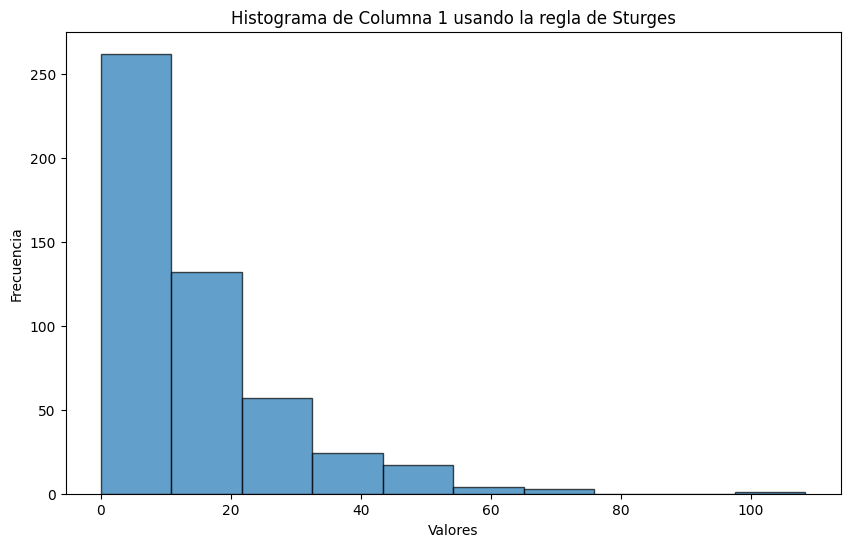

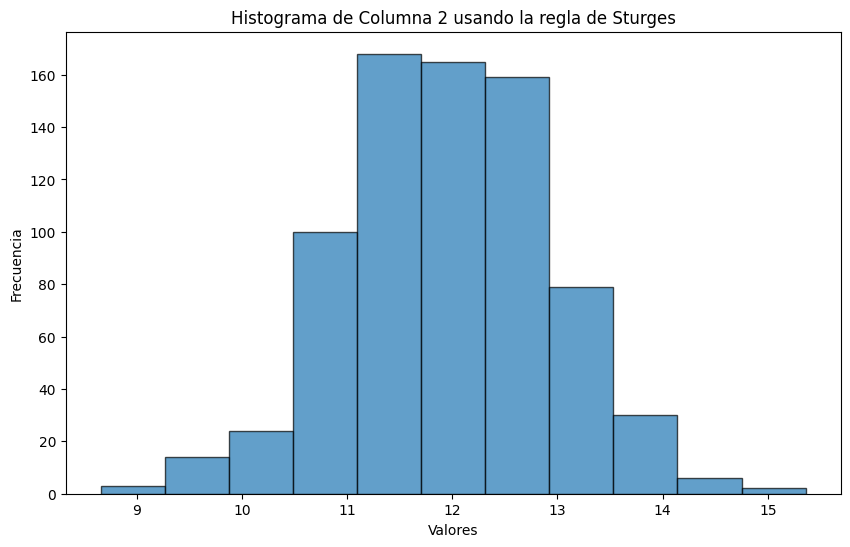

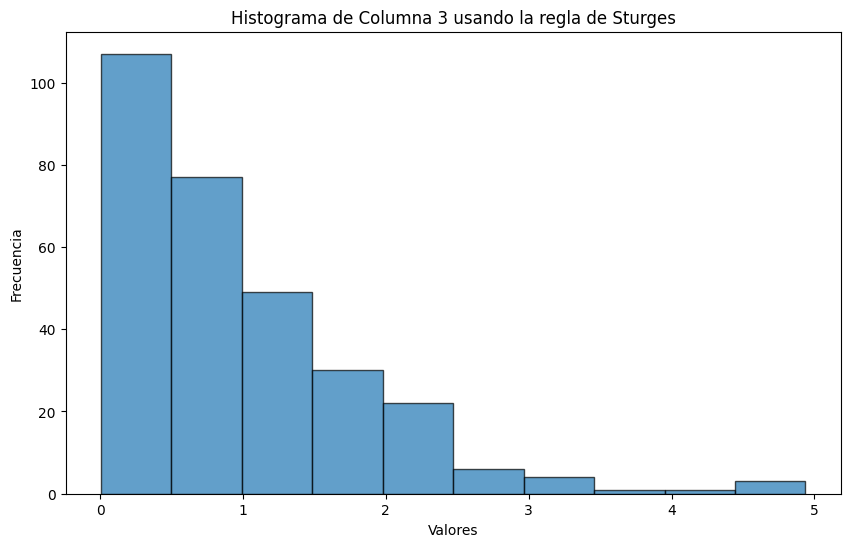

In [72]:
def plot_histogram(data, column_name):
    # Número de observaciones
    n = len(data)

    # Calcular el número de clases usando la regla de Sturges
    num_classes = int(np.ceil(np.log2(n) + 1))

    # Crear el histograma
    #plt.hist(data, bins=num_classes, edgecolor='black', alpha=0.7)

     # Crear el histograma
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=num_classes, edgecolor='black', alpha=0.7)

   # Etiquetas y título
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {column_name} usando la regla de Sturges')

    # Mostrar el histograma
    plt.show()


# Leer el archivo CSV
df = pd.read_csv('sample_data/Actividad1Distribuciones.csv')

# Extraer cada columna en arreglos separados
columna1 = df.iloc[:, 0].dropna().values  # Extraer la primera columna
columna2 = df.iloc[:, 1].dropna().values  # Extraer la segunda columna
columna3 = df.iloc[:, 2].dropna().values  # Extraer la tercera columna

plot_histogram(columna1, 'Columna 1')
plot_histogram(columna2, 'Columna 2')
plot_histogram(columna3, 'Columna 3')

# **b.- Compara el número de clases con el obtenido con la regla de Scott**

In [77]:
n = len(columna1)
n2 = len(columna2)
n3 = len(columna3)

k_sturges1 = int(np.ceil(np.log2(n) + 1))
k_sturges2 = int(np.ceil(np.log2(n2) + 1))
k_sturges3 = int(np.ceil(np.log2(n3) + 1))

# Calcular el número de clases con la regla de Scott
std_data1 = np.std(columna1)
std_data2 = np.std(columna2)
std_data3 = np.std(columna3)

bin_width_scott1 = (3.5 * std_data1) / (n ** (1/3))
bin_width_scott2 = (3.5 * std_data2) / (n2 ** (1/3))
bin_width_scott3 = (3.5 * std_data3) / (n3 ** (1/3))


k_scott1 = int(np.ceil((max(columna1) - min(columna1)) / bin_width_scott1))
k_scott2 = int(np.ceil((max(columna2) - min(columna2)) / bin_width_scott2))
k_scott3 = int(np.ceil((max(columna3) - min(columna3)) / bin_width_scott3))


print(f'Número de clases según la regla de Sturges columna 1: {k_sturges1}')
print(f'Número de clases según la regla de Scott columna 1: {k_scott1}')

print(f'Número de clases según la regla de Sturges columna 2: {k_sturges2}')
print(f'Número de clases según la regla de Scott columna 2: {k_scott2}')

print(f'Número de clases según la regla de Sturges columna 3: {k_sturges3}')
print(f'Número de clases según la regla de Scott columna 3: {k_scott3}')

Número de clases según la regla de Sturges columna 1: 10
Número de clases según la regla de Scott columna 1: 19
Número de clases según la regla de Sturges columna 2: 11
Número de clases según la regla de Scott columna 2: 18
Número de clases según la regla de Sturges columna 3: 10
Número de clases según la regla de Scott columna 3: 12


# **c.- Construye e interpreta un gráfico Q-Q para comprobar si los datos provienen de una distribución normal. Estima los parámetros utilizando la regresión de un gráfico probabilístico.**

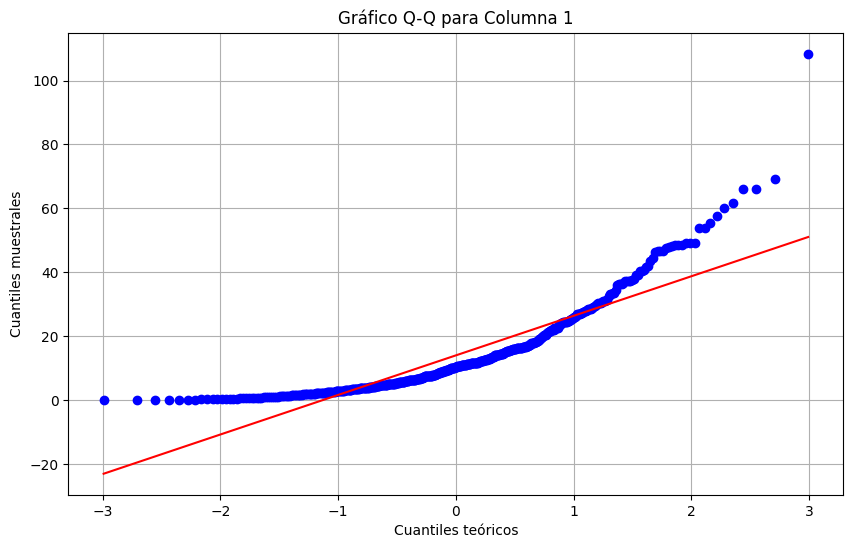

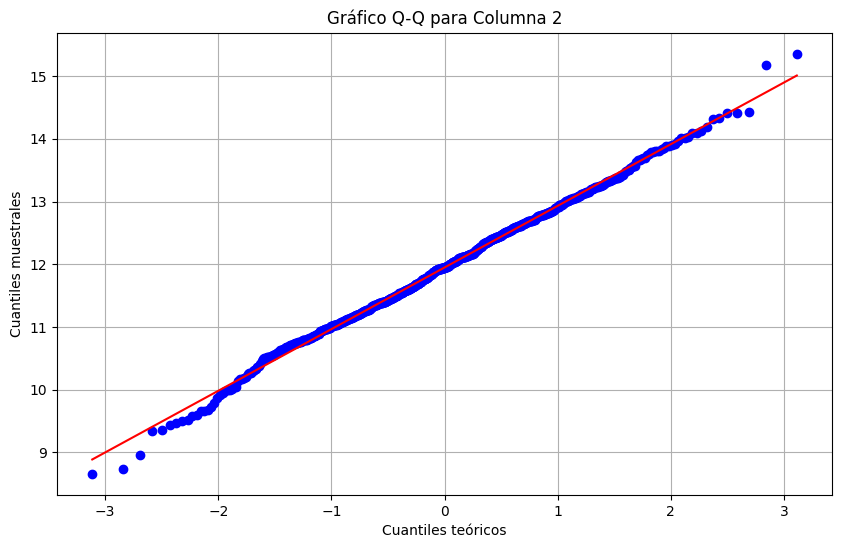

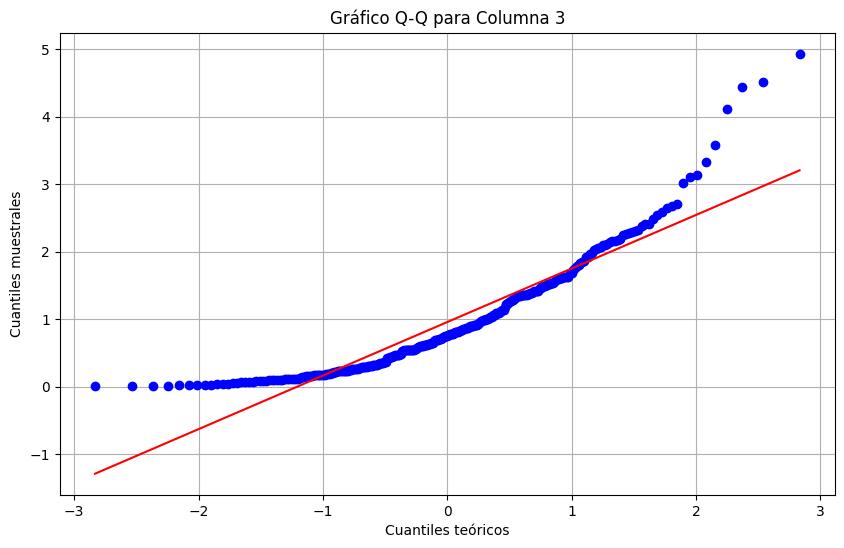

In [73]:
def qq_plot(data, column_name):
    # Q-Q plot
    plt.figure(figsize=(10, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q para {column_name}')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles muestrales')
    plt.grid(True)
    plt.show()

# Crear gráficos Q-Q para cada columna
qq_plot(columna1, 'Columna 1')
qq_plot(columna2, 'Columna 2')
qq_plot(columna3, 'Columna 3')

# **d.- Utilizando Minitab o algún otro software, ¿a qué distribución es más probable que pertenezca cada conjunto de datos y cuáles serían sus respectivos parámetros?**

Podemos observar que en la segunda grafica los puntos se alinean casi perfectamente con la línea, por lo que creo que es una distribución normal.

La grafica 1 y 3 tienen más una curvatura, no parece que pertenezcan a la distribución normal, podría tratarse de distribuciones de cola pesada, binomial o alguna otra.
